# Time Series Task

In [ ]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt

## Data Visualization

In [2]:
# load dataset
df = pd.read_csv('raw_data.csv')
df.head()

,date,target,month,Summer,Winter,Autumn,Spring,quarter_1,quarter_2,quarter_3,...,Friday,Saturday,Sunday,weekend,holidays_flag,vacations_flag,temp,humidity,wind,raining
0,9/16/2022,89,1,0,1,0,0,1,0,0,...,1,0,0,1,0,0,None,None,None,None
1,9/17/2022,3,1,0,1,0,0,1,0,0,...,0,1,0,1,0,0,None,None,None,None
2,9/18/2022,263,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,None,None,None,None
3,9/19/2022,257,2,0,1,0,0,1,0,0,...,0,0,0,0,0,0,None,None,None,None
4,9/20/2022,233,2,0,1,0,0,1,0,0,...,0,0,0,0,0,0,None,None,None,None


In [3]:
df.dtypes

date              object
target             int64
month              int64
Summer             int64
Winter             int64
Autumn             int64
Spring             int64
quarter_1          int64
quarter_2          int64
quarter_3          int64
quarter_4          int64
Monday             int64
Tuesday            int64
Wednesday          int64
Thursday           int64
Friday             int64
Saturday           int64
Sunday             int64
weekend            int64
holidays_flag      int64
vacations_flag     int64
temp              object
humidity          object
wind              object
raining           object
dtype: object

In [4]:
df.describe()

,target,month,Summer,Winter,Autumn,Spring,quarter_1,quarter_2,quarter_3,quarter_4,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,weekend,holidays_flag,vacations_flag
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,160.157847,6.521898,0.251825,0.247263,0.249088,0.251825,0.247263,0.249088,0.251825,0.251825,0.143248,0.142336,0.142336,0.142336,0.143248,0.143248,0.143248,0.286496,0.041971,0.216241
std,92.226353,3.450561,0.434259,0.431618,0.432682,0.434259,0.431618,0.432682,0.434259,0.434259,0.350486,0.349554,0.349554,0.349554,0.350486,0.350486,0.350486,0.452330,0.200614,0.411868
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,84.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,188.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,224.000000,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,401.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.date = pd.to_datetime(df.date)

In [6]:
df.date.min(), df.date.max()

(Timestamp('2022-09-16 00:00:00'), Timestamp('2025-09-15 00:00:00'))

In [7]:
df.groupby(df.date.dt.weekday).target.describe()

,count,mean,std,min,25%,50%,75%,max
date,,,,,,,,
0,157.0,212.700637,61.063908,3.0,191.0,216.0,241.0,361.0
1,156.0,209.243590,58.234827,0.0,185.0,211.0,245.5,396.0
2,156.0,203.173077,54.156424,0.0,171.0,203.5,233.5,345.0
3,156.0,203.384615,64.105806,1.0,173.0,203.0,231.0,401.0
4,157.0,78.656051,20.512571,1.0,67.0,79.0,92.0,139.0
5,157.0,3.745223,3.287319,0.0,1.0,3.0,5.0,19.0
6,157.0,211.063694,48.524469,3.0,189.0,211.0,235.0,332.0


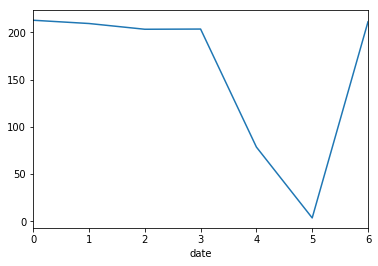

In [8]:
df.groupby(df.date.dt.weekday).target.mean().plot()
plt.show()

In [9]:
df.groupby(df.date.dt.month).target.describe()

,count,mean,std,min,25%,50%,75%,max
date,,,,,,,,
1,93.0,146.440860,84.815460,0.0,76.00,185.0,212.0,264.0
2,85.0,150.635294,85.869620,0.0,81.00,184.0,212.0,279.0
3,93.0,155.892473,84.489832,0.0,72.00,192.0,215.0,267.0
4,90.0,170.900000,87.103974,0.0,88.25,209.0,234.5,268.0
5,93.0,167.559140,92.576345,0.0,93.00,207.0,235.0,300.0
6,90.0,157.111111,112.020508,0.0,31.00,198.5,248.0,401.0
7,93.0,192.698925,112.772451,0.0,95.00,219.0,277.0,396.0
8,93.0,180.086022,102.314802,0.0,92.00,207.0,247.0,387.0
9,90.0,171.277778,95.096761,0.0,93.50,194.0,232.5,360.0


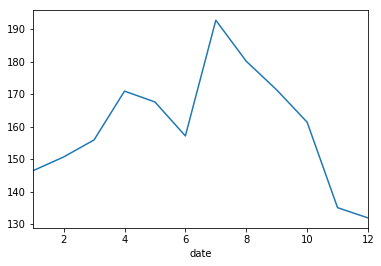

In [10]:
df.groupby(df.date.dt.month).target.mean().plot()
plt.show()

In [11]:
df.groupby(df.date.dt.year).target.describe()

,count,mean,std,min,25%,50%,75%,max
date,,,,,,,,
2022,107.0,153.607477,82.524868,0.0,90.00,177.0,211.0,281.0
2023,365.0,175.868493,104.848316,0.0,80.00,207.0,248.0,401.0
2024,366.0,153.215847,84.618466,0.0,88.25,180.0,215.0,324.0
2025,258.0,150.496124,84.623738,0.0,79.50,186.0,212.0,277.0


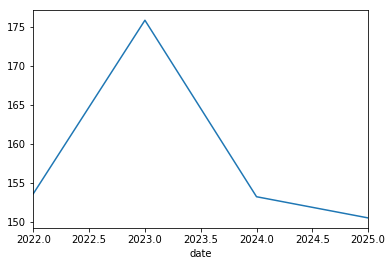

In [12]:
df.groupby(df.date.dt.year).target.mean().plot()
plt.show()

In [13]:
df.groupby([df.date.dt.year, df.date.dt.month]).target.describe()

count        mean         std  min     25%    50%     75%    max
date date                                                                  
2022 9      15.0  174.333333   88.144092  3.0  113.00  209.0  236.50  263.0
     10     31.0  173.774194   92.140006  0.0   99.00  211.0  236.00  281.0
     11     30.0  135.766667   67.063369  1.0   92.25  169.5  176.75  201.0
     12     31.0  140.677419   80.461745  1.0   66.00  177.0  207.00  251.0
2023 1      31.0  157.354839   95.021243  1.0   72.00  201.0  229.00  264.0
     2      28.0  157.107143   94.546614  1.0   60.25  205.0  222.00  279.0
     3      31.0  168.548387   91.145612  4.0   66.00  209.0  232.00  267.0
     4      30.0  171.666667   97.362576  1.0   61.75  227.0  244.75  255.0
     5      31.0  195.806452   94.886395  4.0  157.50  236.0  256.00  300.0
     6      30.0  173.400000  126.589099  0.0   69.25  186.0  280.50  401.0
     7      31.0  210.483871  141.168899  7.0   86.00  283.0  325.00  396.0
     8      31.0  230.838710  118.041263  5.0  185.00  281.0  299.50  387.0
     9      30.0  199.766667  118.838541  0.0   87.00  246.5  296.75  360.0
     10     31.0  173.258065   82.811822  1.0  144.00  207.0  228.00  279.0
     11     30.0  146.566667   71.837308  0.0  109.50  166.0  190.25  248.0
     12     31.0  123.419355   71.911879  3.0   70.00  159.0  186.50  207.0
2024 1      31.0  144.967742   84.321798  0.0   80.50  173.0  212.00  245.0
     2      29.0  145.034483   79.308837  0.0   85.00  179.0  200.00  249.0
     3      31.0  153.258065   82.265006  3.0   92.00  193.0  210.50  248.0
     4      30.0  180.933333   86.697625  4.0  115.75  223.0  235.75  268.0
     5      31.0  173.580645   89.182500  3.0  100.00  215.0  229.50  288.0
     6      30.0  146.866667  108.733376  0.0    8.75  180.0  248.00  288.0
     7      31.0  201.935484   99.300197  0.0  158.00  240.0  271.50  324.0
     8      31.0  153.290323   82.767624  0.0   87.50  189.0  212.50  251.0
     9      30.0  146.333333   71.422170  0.0  107.25  171.5  191.75  228.0
     10     31.0  136.967742   67.653275  0.0  100.50  160.0  186.50  215.0
     11     30.0  122.800000   69.002449  0.0   73.75  146.0  179.25  211.0
     12     31.0  131.580645   65.914477  0.0  100.00  159.0  178.00  197.0
2025 1      31.0  137.000000   75.524389  0.0   76.00  171.0  199.00  217.0
     2      28.0  149.964286   86.026474  1.0   84.00  184.0  211.50  265.0
     3      31.0  145.870968   80.870160  0.0   76.50  179.0  201.50  260.0
     4      30.0  160.100000   77.866530  0.0  117.50  189.5  211.00  255.0
     5      31.0  133.290323   85.147399  0.0   66.50  179.0  204.00  235.0
     6      30.0  151.066667  101.205811  0.0   68.25  209.0  233.50  273.0
     7      31.0  165.677419   89.677343  0.0  100.00  204.0  227.50  277.0
     8      31.0  156.129032   85.568196  0.0   86.00  187.0  218.50  263.0
     9      15.0  161.133333   81.898776  3.0  113.00  196.0  214.00  241.0

In [14]:
df.set_index('date', inplace=True)

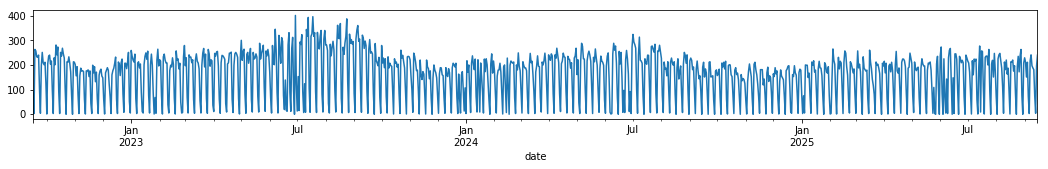

In [15]:
df.target.plot(figsize=(18, 2))
plt.show()

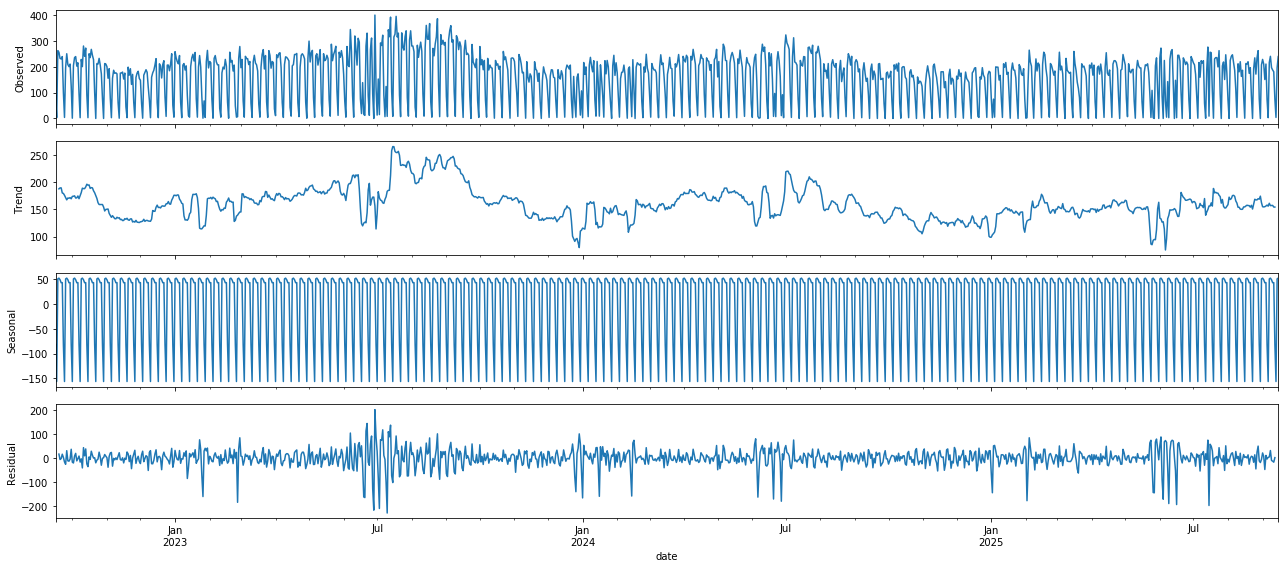

In [16]:
import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df[['target']], model='additive')
fig = decomposition.plot()
plt.show()

##### The plot above clearly shows that the target is unstable, along with its obvious seasonality.

In [17]:
# check stationarity
def check_stationarity(data):
    # plot the time series to check for trend and seasonality
    data.plot(figsize=(10, 10))
    
    # check if histogram fits a Gaussian Curve, then split data into two parts, calculate means and variances and see if they vary
    data.hist(figsize=(10, 10))
    plt.show()
    
    X = data["target"].values
    split = int(len(X) / 2)
    X1, X2 = X[0:split], X[split:]
    mean1, mean2 = X1.mean(), X2.mean()
    var1, var2 = X1.var(), X2.var()
    print('mean1=%f, mean2=%f' % (mean1, mean2))
    print('variance1=%f, variance2=%f' % (var1, var2))
    
    # if corresponding means and variances differ slightly (by less than 10), we consider that the time series might be stationary
    if (abs(mean1-mean2) <= 10 and abs(var1-var2) <= 10):
        print("Time Series may be Stationary, since means and variances vary only slightly.\n")
    else:
        print("Time Series may NOT be Stationary, since means and variances vary significantly.\n")
        
    # statistical test (Augmented Dickey-Fuller statistic)
    print("Performing Augmented Dickey-Fuller Test to confirm stationarity...")
    
    result = adfuller(X)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    
    p = result[1]
    if (p > 0.01):
        print("Time Series is NOT Stationary, since p-value > 0.01")
        return False
    else:
        print("Time Series is Stationary, since p-value <= 0.01")
        return True

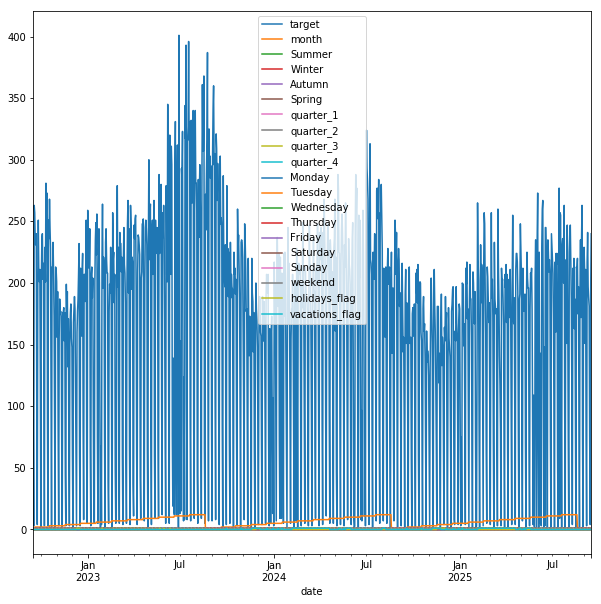

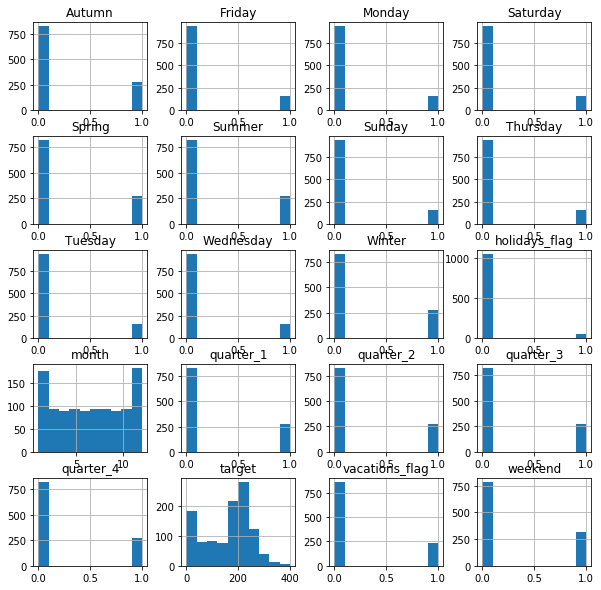

mean1=167.124088, mean2=153.191606
variance1=9683.192631, variance2=7215.629346
Time Series may NOT be Stationary, since means and variances vary significantly.

Performing Augmented Dickey-Fuller Test to confirm stationarity...
ADF Statistic: -2.925916
p-value: 0.042416
Time Series is NOT Stationary, since p-value > 0.01


In [18]:
is_stationary = check_stationarity(df)

# Time series forecasting with LSTM

In [19]:
# load dataset
df = df[['target']]
# configure
n_lag = 1
n_seq = 2
n_test = 100
n_valid = 400

In [26]:
# convert time series into supervised learning problem
def series_to_supervised(data, n_in, n_out, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.Series(diff)

# transform series into train and test sets for supervised learning
def prepare_data(series, n_valid, n_test, n_lag, n_seq):
    # extract raw values
    raw_values = series.values
    # transform data to be stationary
    diff_series = difference(raw_values, 1)
    diff_values = diff_series.values
    diff_values = diff_values.reshape(len(diff_values), 1)
    # rescale values to -1, 1
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaled_values = scaler.fit_transform(diff_values)
    scaled_values = scaled_values.reshape(len(scaled_values), 1)
    # transform into supervised learning problem X, y
    supervised = series_to_supervised(scaled_values, n_lag, n_seq)
    supervised_values = supervised.values
    # split into train and test sets
    train, validation, test = supervised_values[0:-n_valid], supervised_values[-n_valid:-n_test], supervised_values[-n_test:]
    return scaler, train, validation, test

# plot the forecasts in the context of the original dataset
def plot_forecasts(series, forecasts, n_test):
    plt.plot(series.values)
    for i in range(len(forecasts)):
        off_s = len(series) - n_test + i - 1
        off_e = off_s + len(forecasts[i]) + 1
        xaxis = [x for x in range(off_s, off_e)]
        yaxis = [series.values[off_s]] + forecasts[i]
        plt.plot(xaxis, yaxis, color='red')
    plt.show()
    
# fit an LSTM network to training data
def fit_lstm(train, n_lag, n_seq, n_batch, nb_epoch, n_neurons):
    # reshape training into [samples, timesteps, features]
    X, y = train[:, 0:n_lag], train[:, n_lag:]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    # design network
    model = Sequential()
    model.add(LSTM(n_neurons, batch_input_shape=(n_batch, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(y.shape[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    # fit network
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=n_batch, verbose=0, shuffle=False)
        model.reset_states()
    return model

# inverse data transform on forecasts
def inverse_transform(series, forecasts, scaler, n_test):
    inverted = list()
    for i in range(len(forecasts)):
        # create array from forecast
        forecast = np.array(forecasts[i])
        forecast = forecast.reshape(1, len(forecast))
        # invert scaling
        inv_scale = scaler.inverse_transform(forecast)
        inv_scale = inv_scale[0, :]
        # invert differencing
        index = len(series) - n_test + i - 1
        last_ob = series.values[index]
        inv_diff = inverse_difference(last_ob, inv_scale)
        # store
        inverted.append(inv_diff)
    return inverted

# forecast with an LSTM
def forecast_lstm(model, X, n_batch):
    X = X.reshape(1, 1, len(X))
    forecast = model.predict(X, batch_size=n_batch)
    return [x for x in forecast[0, :]]

# evaluate the persistence model
def predict(model, n_batch, train, test, n_lag, n_seq):
    forecasts = list()
    for i in range(len(test)):
        X, y = test[i, 0:n_lag], test[i, n_lag:]
        forecast = forecast_lstm(model, X, n_batch)
        forecasts.append(forecast)
    return forecasts

# invert differenced forecast
def inverse_difference(last_ob, forecast):
    # invert first forecast
    inverted = list()
    inverted.append(forecast[0] + last_ob)
    # propagate difference forecast using inverted first value
    for i in range(1, len(forecast)):
        inverted.append(forecast[i] + inverted[i-1])
    return inverted

# evaluate the RMSE for each forecast time step
def evaluation(test, forecasts, n_lag, n_seq):
    rmseVal=[]
    for i in range(n_seq):
        actual = [row[i] for row in test]
        predicted = [forecast[i] for forecast in forecasts]
        rmse = sqrt(mean_squared_error(actual, predicted))
        rmseVal.append(rmse)
        # print('t+%d RMSE: %f' % ((i+1), rmse))
    return rmseVal

In [ ]:
# prepare data
scaler, train, validation, test = prepare_data(df, n_valid, n_test, n_lag, n_seq)

In [ ]:
# Hyper-parameters tuning
n_epochs = [100, 150, 200]
batch = 1
n_neurons = [1,2,3]
opt_rmse1 = 999999999999
opt_rmse2 = 999999999999

for epo in n_epochs:
        for neuron in n_neurons:
            # fit model
            model = fit_lstm(train, n_lag, n_seq, batch, epo, neuron)
            # predict
            forecasts = predict(model, batch, train, validation, n_lag, n_seq)
            # inverse transform forecasts and test
            forecasts = inverse_transform(df, forecasts, scaler, n_valid+2)
            actual = [row[n_lag:] for row in validation]
            actual = inverse_transform(df, actual, scaler, n_valid+2)
            # evaluate forecasts            
            rmse = evaluation(actual, forecasts, n_lag, n_seq)
            # print('neurons: %d , batch size: %d , epochs: %d' % (neuron, batch, epo))
            if (rmse[0] < opt_rmse) and (rmse[1] < opt_rmse2):
                opt_rmse1 = rmse[0]
                opt_rmse2 = rmse[1]
                opt_neuron = neuron
                opt_batch = batch
                opt_epo = epo

In [33]:
train = np.concatenate([train, validation])

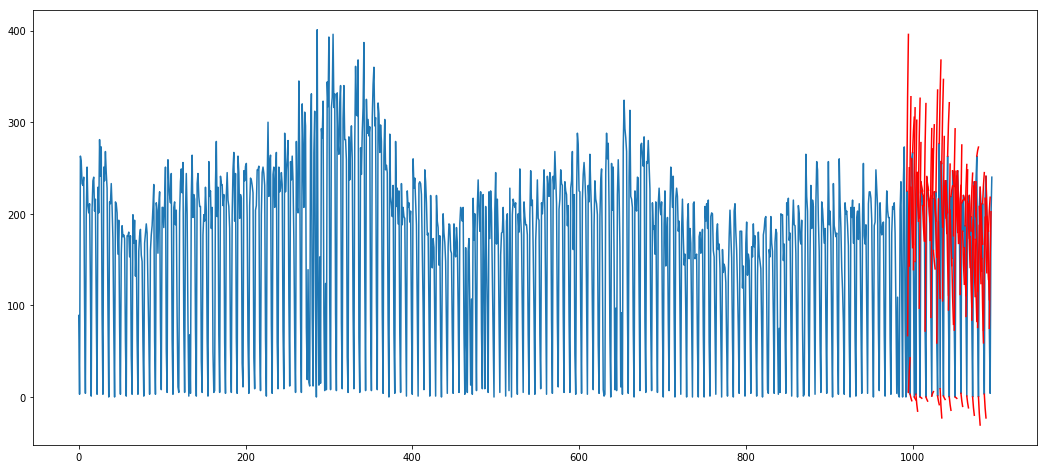

In [35]:
# fit model
model = fit_lstm(train, n_lag, n_seq, opt_batch, opt_epo, opt_neuron)
# make forecasts
forecasts = predict(model, opt_batch, train, test, n_lag, n_seq)
# inverse transform forecasts and test
forecasts = inverse_transform(df, forecasts, scaler, n_test+2)
actual = [row[n_lag:] for row in test]
actual = inverse_transform(df, actual, scaler, n_test+2)
# evaluate forecasts
evaluation(actual, forecasts, n_lag, n_seq)
# plot forecasts
plot_forecasts(df, forecasts, n_test+2)

In [36]:
# Export predictions to json file
# import json
# with open('data.json', 'w') as outfile:
#    json.dump(predictions, outfile)